In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/competitive-data-science-predict-future-sales/items.csv
/kaggle/input/competitive-data-science-predict-future-sales/shops.csv
/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv
/kaggle/input/competitive-data-science-predict-future-sales/test.csv
/kaggle/input/competitive-data-science-predict-future-sales/sample_submission.csv
/kaggle/input/competitive-data-science-predict-future-sales/item_categories.csv


> ### Descrition of this competition:

|Data               |fields                                                                     |
|-------------------|---------------------------------------------------------------------------|
|ID                 |an Id that represents a (Shop, Item) tuple within the test set             |
|shop_id            |unique identifier of a shop                                                |
|item_id            |unique identifier of a product                                             |
|item_category_id   |unique identifier of item category                                         |
|item_cnt_day       |number of products sold.You are predicting a monthly amount of this measure|
|item_price         |current price of an item                                                   |
|date               |date in format dd/mm/yyyy                                                  |
|date_block_num     |a consecutive month number, used for convenience. January 2013 is 0,       |
|                   | February 2013 is 1,..., October 2015 is 33                                |
|item_name          |name of item                                                               |
|shop_name          |name of shop                                                               |
|item_category_name |name of item category                                                      |

<h2 style="color:blue" align="left"> 1. Importing Libraries </h2>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
import gc

<h2 style="color:blue" align="left"> 2. Import Datasets </h2>

In [4]:
train = pd.read_csv("/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv")
test = pd.read_csv("/kaggle/input/competitive-data-science-predict-future-sales/test.csv")
items = pd.read_csv("/kaggle/input/competitive-data-science-predict-future-sales/items.csv")
item_cat = pd.read_csv("/kaggle/input/competitive-data-science-predict-future-sales/item_categories.csv")
Shops = pd.read_csv("/kaggle/input/competitive-data-science-predict-future-sales/shops.csv")
submission = pd.read_csv("/kaggle/input/competitive-data-science-predict-future-sales/sample_submission.csv")

In [5]:
display(train.head())
display(test.head())
display(items.head())
display(item_cat.head())
display(Shops.head())
display(submission.head())

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [6]:
train = pd.merge(train, items, on='item_id', how='inner')
train = pd.merge(train, item_cat, on='item_category_id', how='inner')
train = pd.merge(train, Shops, on='shop_id', how='inner')

test = pd.merge(test, items, on='item_id', how='inner')
test = pd.merge(test, item_cat, on='item_category_id', how='inner')
test = pd.merge(test, Shops, on='shop_id', how='inner')

In [7]:
display(train.head())
display(test.head())

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
0,02.01.2013,0,59,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
1,26.04.2013,3,59,944,150.0,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
2,26.06.2013,5,59,944,199.5,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
3,20.07.2013,6,59,944,199.5,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
4,14.09.2013,8,59,944,299.0,2.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""


,ID,shop_id,item_id,item_name,item_category_id,item_category_name,shop_name
0,0,5,5037,"NHL 15 [PS3, русские субтитры]",19,Игры - PS3,"Вологда ТРЦ ""Мармелад"""
1,2,5,5233,"Need for Speed Rivals (Essentials) [PS3, русск...",19,Игры - PS3,"Вологда ТРЦ ""Мармелад"""
2,15,5,4872,"Minecraft. Playstation 3 Edition [PS3, русская...",19,Игры - PS3,"Вологда ТРЦ ""Мармелад"""
3,21,5,5002,"NBA 2K16 [PS3, русская документация]",19,Игры - PS3,"Вологда ТРЦ ""Мармелад"""
4,23,5,5814,"Plants vs. Zombies Garden Warfare [PS3, русска...",19,Игры - PS3,"Вологда ТРЦ ""Мармелад"""


In [8]:
display(train.shape)
display(test.shape)

(2935849, 10)

(214200, 7)

In [9]:
display(train.info())
display(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 0 to 2935848
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   date                object 
 1   date_block_num      int64  
 2   shop_id             int64  
 3   item_id             int64  
 4   item_price          float64
 5   item_cnt_day        float64
 6   item_name           object 
 7   item_category_id    int64  
 8   item_category_name  object 
 9   shop_name           object 
dtypes: float64(2), int64(4), object(4)
memory usage: 246.4+ MB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214200 entries, 0 to 214199
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   ID                  214200 non-null  int64 
 1   shop_id             214200 non-null  int64 
 2   item_id             214200 non-null  int64 
 3   item_name           214200 non-null  object
 4   item_category_id    214200 non-null  int64 
 5   item_category_name  214200 non-null  object
 6   shop_name           214200 non-null  object
dtypes: int64(4), object(3)
memory usage: 13.1+ MB


None

In [10]:
display(train.dtypes)
display(test.dtypes)

date                   object
date_block_num          int64
shop_id                 int64
item_id                 int64
item_price            float64
item_cnt_day          float64
item_name              object
item_category_id        int64
item_category_name     object
shop_name              object
dtype: object

ID                     int64
shop_id                int64
item_id                int64
item_name             object
item_category_id       int64
item_category_name    object
shop_name             object
dtype: object

In [11]:
display(train.count())
display(test.count())

date                  2935849
date_block_num        2935849
shop_id               2935849
item_id               2935849
item_price            2935849
item_cnt_day          2935849
item_name             2935849
item_category_id      2935849
item_category_name    2935849
shop_name             2935849
dtype: int64

ID                    214200
shop_id               214200
item_id               214200
item_name             214200
item_category_id      214200
item_category_name    214200
shop_name             214200
dtype: int64

In [12]:
print('Number of duplicates in train:', len(train[train.duplicated()]))
print('Number of duplicates in test:', len(test[test.duplicated()]))

Number of duplicates in train: 6
Number of duplicates in test: 0


In [13]:
train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00,4.000138e+01
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00,1.710076e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01,0.000000e+00
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00,2.800000e+01
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00,4.000000e+01
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00,5.500000e+01
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03,8.300000e+01


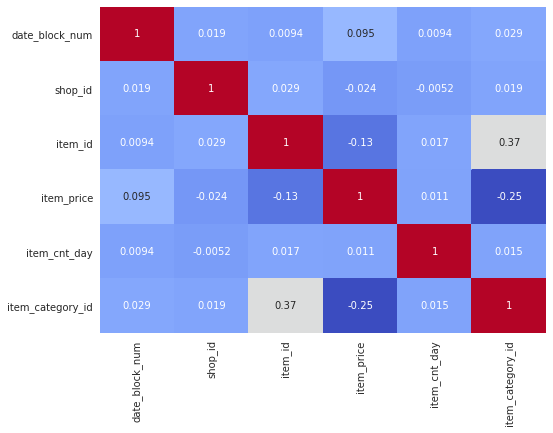

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(train.corr(), annot=True, cbar=False, cmap='coolwarm')

### 1. Items

In [15]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [16]:
items.shape

(22170, 3)

In [17]:
items.dtypes

item_name           object
item_id              int64
item_category_id     int64
dtype: object

In [18]:
items.count()

item_name           22170
item_id             22170
item_category_id    22170
dtype: int64

In [19]:
print('Number of Duplicates in item:', len(items[items.duplicated()]))

Number of Duplicates in item: 0


In [20]:
print('Unique item names:', len(items['item_name'].unique()))

Unique item names: 22170


In [21]:
items.item_id.nunique()

22170

In [22]:
items.item_category_id.nunique()

84

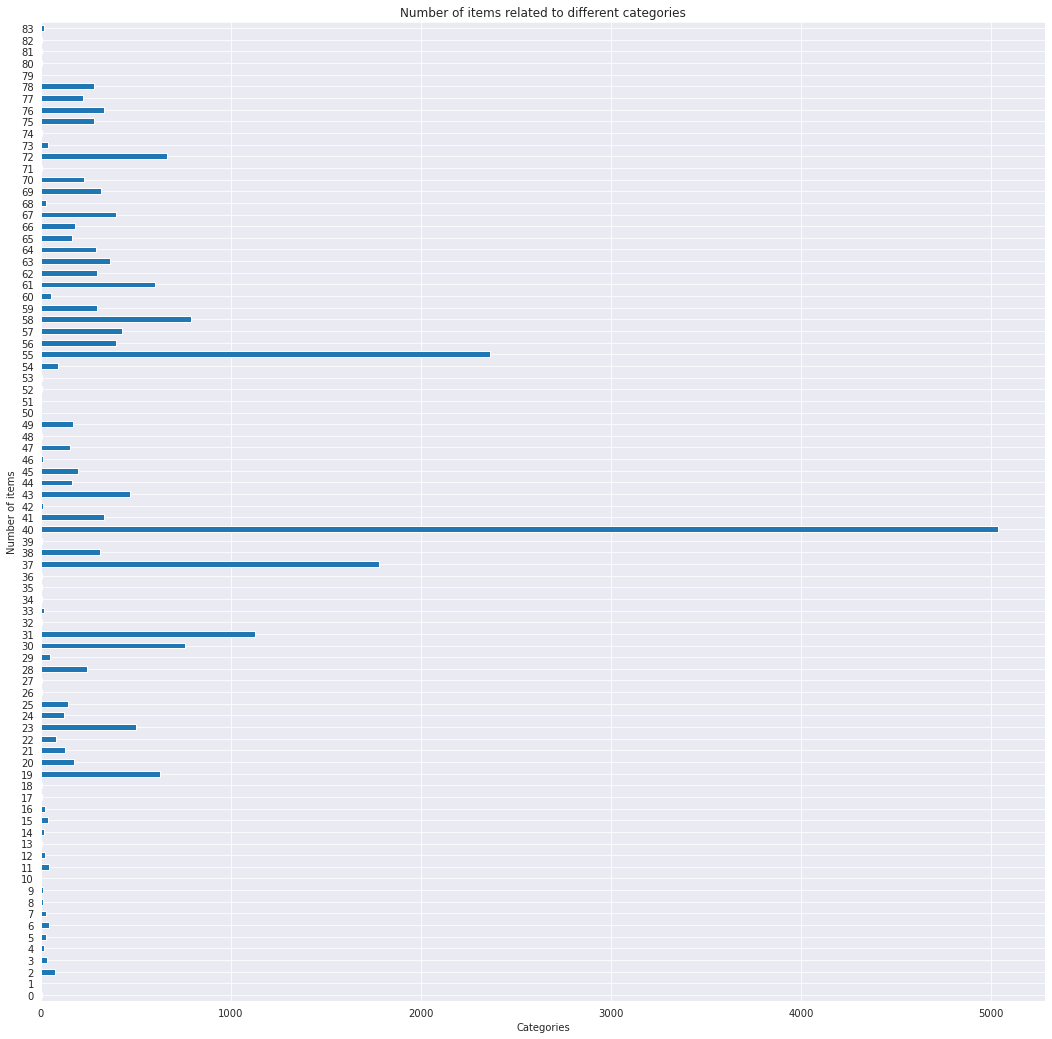

In [23]:
plt.figure(figsize=(18,18))
items.groupby('item_category_id')['item_id'].size().plot.barh(rot=0)
plt.title('Number of items related to different categories')
plt.xlabel('Categories')
plt.ylabel('Number of items');

In [24]:
items.groupby('item_category_id')['item_id'].size().mean()

263.92857142857144

In [25]:
items.groupby('item_category_id')['item_id'].size().max()

5035

In [26]:
items.groupby('item_category_id')['item_id'].size().min()

1

In [27]:
item_cat[item_cat['item_category_id'].isin(items.groupby('item_category_id')['item_id'].size().nlargest(5).index)]

,item_category_name,item_category_id
31,Игры PC - Цифра,31
37,Кино - Blu-Ray,37
40,Кино - DVD,40
55,Музыка - CD локального производства,55
58,Музыка - Винил,58


In [28]:
item_cat[item_cat['item_category_id']\
                .isin((items.groupby('item_category_id')['item_id'].size()[items.groupby('item_category_id')['item_id'].size()==1])\
                      .index)]

,item_category_name,item_category_id
10,Игровые консоли - PS2,10
51,Книги - Познавательная литература,51
79,Служебные,79


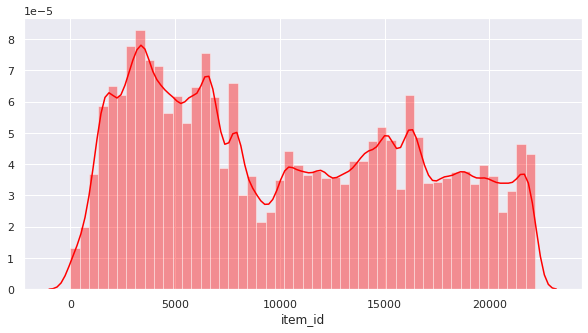

In [50]:
plt.figure(figsize=(10, 5))
sns.distplot(train['item_id'], color="red");

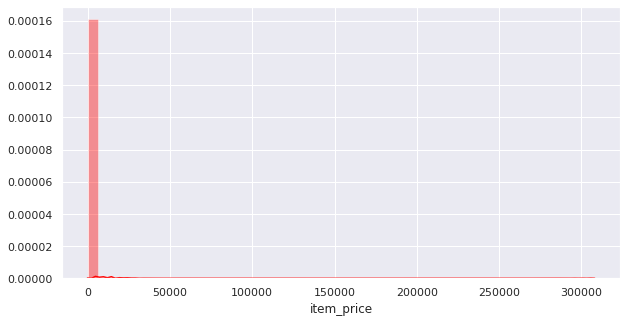

In [51]:
plt.figure(figsize=(10, 5))
sns.distplot(train['item_price'], color="red");

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


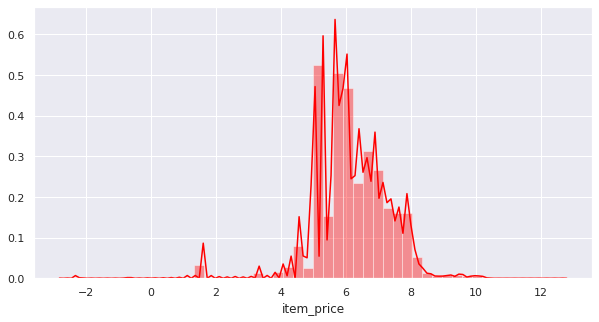

In [52]:
plt.figure(figsize=(10, 5))
sns.distplot(np.log(train['item_price']), color="red");

#### 2. Item Category

In [29]:
item_cat.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [30]:
item_cat.shape

(84, 2)

In [31]:
item_cat.dtypes

item_category_name    object
item_category_id       int64
dtype: object

In [32]:
item_cat.count()

item_category_name    84
item_category_id      84
dtype: int64

In [33]:
print('Number of Duplicates in item_cat:', len(item_cat[item_cat.duplicated()]))

Number of Duplicates in item_cat: 0


In [34]:
print('Unique item names:', len(item_cat['item_category_id'].unique()))

Unique item names: 84


In [35]:
item_cat['item_category_id'].nunique()

84

In [36]:
item_cat['item_category_id'].values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83])

### 3. Shop

In [37]:
Shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [38]:
Shops.shape

(60, 2)

In [39]:
Shops.dtypes

shop_name    object
shop_id       int64
dtype: object

In [40]:
Shops.count()

shop_name    60
shop_id      60
dtype: int64

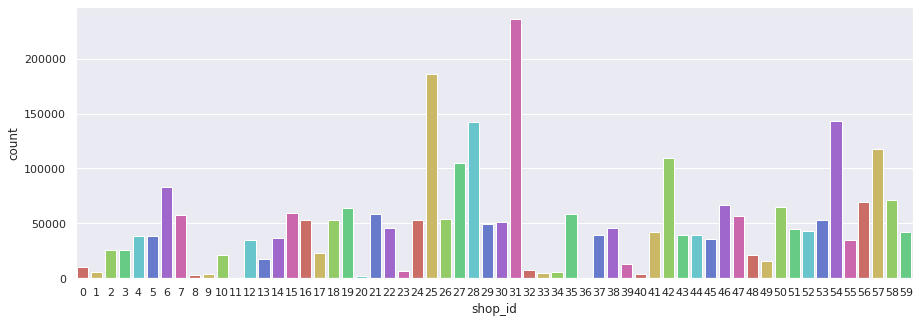

In [49]:
color = sns.color_palette("hls", 8)
sns.set(style="darkgrid")
plt.figure(figsize=(15, 5))
sns.countplot(x=train['shop_id'], data=train, palette=color)

In [62]:
print("Percentual of total sold by each Shop")
print((train.groupby('shop_name')['item_cnt_day'].sum().nlargest(25) / train.groupby('shop_name')['item_cnt_day'].sum().sum() * 100)[:5])

train.groupby('shop_name')['item_cnt_day'].sum().nlargest(25).iplot(kind='bar',
                                                                    title='TOP 25 Shop Name by Total Amount Sold',
                                                    xTitle='Shop Names', 
                                                                       yTitle='Total Sold')

Percentual of total sold by each Shop
shop_name
Москва ТЦ "Семеновский"            8.518625
Москва ТРК "Атриум"                6.631204
Химки ТЦ "Мега"                    5.092640
Москва ТЦ "МЕГА Теплый Стан" II    5.058843
СПб ТК "Невский Центр"             3.972747
Name: item_cnt_day, dtype: float64


AttributeError: 'Series' object has no attribute 'iplot'

### Missing Data

In [41]:
train.isnull().sum()

date                  0
date_block_num        0
shop_id               0
item_id               0
item_price            0
item_cnt_day          0
item_name             0
item_category_id      0
item_category_name    0
shop_name             0
dtype: int64

In [42]:
test.isnull().sum()

ID                    0
shop_id               0
item_id               0
item_name             0
item_category_id      0
item_category_name    0
shop_name             0
dtype: int64

In [43]:
items.isnull().sum()

item_name           0
item_id             0
item_category_id    0
dtype: int64

In [44]:
item_cat.isnull().sum()

item_category_name    0
item_category_id      0
dtype: int64

In [45]:
Shops.isnull().sum()

shop_name    0
shop_id      0
dtype: int64

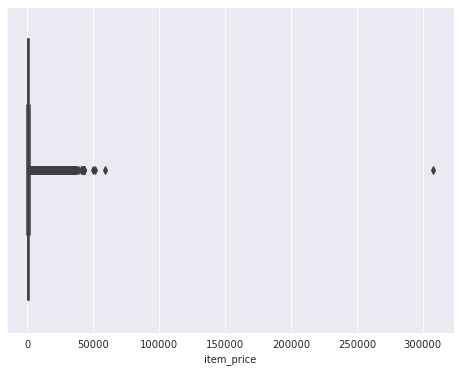

In [46]:
plt.figure(figsize=(8,6))
sns.boxplot(x='item_price', data=train)

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

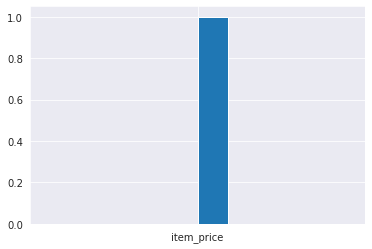

In [47]:
plt.hist(x='item_price')

<h2 style="color:green" align="left"> 5. Data Visualization </h2>

- Used below **visualisation libraries**

     1. Matplotlib
     2. Seaborn (statistical data visualization)
     
     
### 1. Univariate Analysis

- Univariate Analysis : data consists of **only one variable (only x value)**.

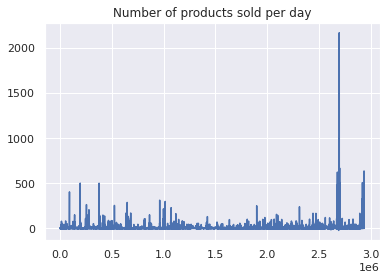

In [54]:
train.item_cnt_day.plot()
plt.title("Number of products sold per day");

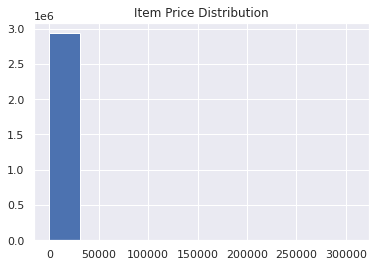

In [55]:
train.item_price.hist()
plt.title("Item Price Distribution");

### 2. Bivariate Analysis

- **Bivariate Analysis** : data involves **two different variables**.

### 3. Multivariate Analysis

- 1. Pair Plot

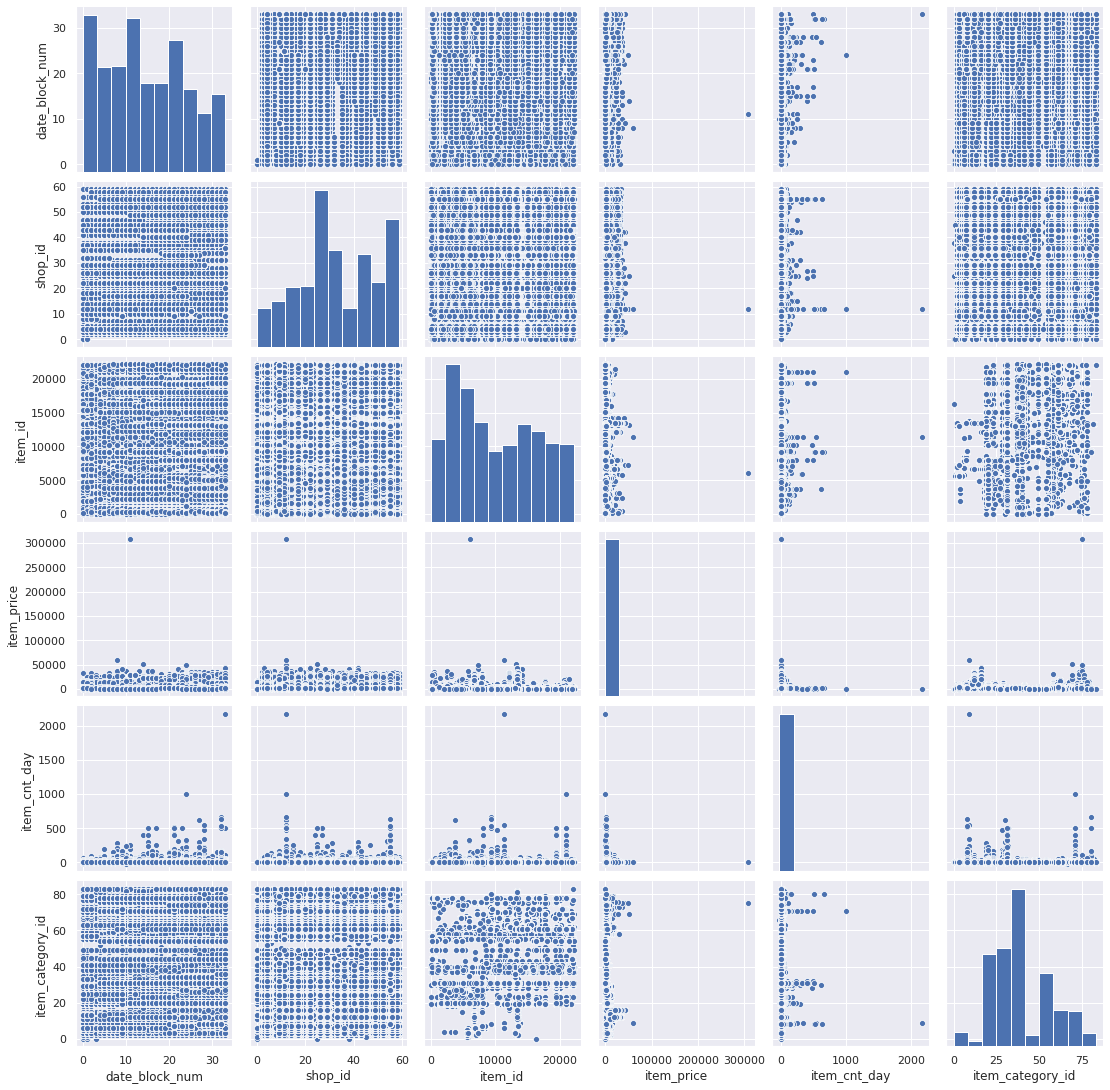

In [53]:
sns.pairplot(train)

### Outliers

In [60]:
def Box_plots(df):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df)
    plt.show()
Box_plots(train['Age'])

def hist_plots(df):
    plt.figure(figsize=(10, 4))
    plt.hist(df)
    plt.title("Histogram Plot")
    plt.show()
hist_plots(train['Age'])

def scatter_plots(df1,df2):
    fig, ax = plt.subplots(figsize=(10,4))
    ax.scatter(df1,df2)
    ax.set_xlabel('Age')
    ax.set_ylabel('Fare')
    plt.title("Scatter Plot")
    plt.show()
scatter_plots(train['Age'],train['Fare'])

def dist_plots(df):
    plt.figure(figsize=(10, 4))
    sns.distplot(df)
    plt.title("Distribution plot")
    sns.despine()
    plt.show()
dist_plots(train['Fare'])

def qq_plots(df):
    plt.figure(figsize=(10, 4))
    qqplot(df,line='s')
    plt.title("Normal QQPlot")
    plt.show()
qq_plots(train['Fare'])

KeyError: 'Age'

<h2 style="color:blue" align="left"> 6. Data Preprocessing </h2>

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix